In [1]:
import sys
import os
sys.path.append(os.getcwd()+"/../")
os.chdir(os.getcwd()+"/../")

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

# LOAD TRAIN

In [3]:
import sys
import os
os.getcwd()

'/hd/sample-proposal'

In [4]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [5]:
from lib.utils.process_input import get_gen_outs

In [6]:

from lib.config.control import *

In [7]:
# X_train, y_train, _, _ = SINGLESTGAN.load_input("train")
# X_valid, y_valid, _, _ = SINGLESTGAN.load_input("valid")
# X_train

In [8]:
import numpy as np

# Input

In [9]:
# import lib.data.preprocess as preprocess
# train_df, valid_df, test_df = preprocess.load_prepared()
# train_df.head()

In [10]:
# o_train, train_buyers, train_nonbuyers = t.load_with_filters("train")
# X = o_train[0]

In [11]:
from lib.utils.process_input import fit_one_hots, get_gen_outs,apply_encoder_in_batch
import numpy as np
def apply_pad_2(mat, N):
    res = [0 for i in range(0,mat.shape[0])]
    i = 0
    for sample in mat:
        res[i] = pad_array_with_constant_arr(sample,i,N)
#         res[i] = np.expand_dims(res[i],axis=2)
        i+=1

    return np.array(res)

gen_outs = get_gen_outs()
PAD_ARRAY = []
no_first = False

MASK_VALUE = -2
for out in gen_outs:
    if out != 1 :
        array_out = np.full(out+1, 0).tolist()
        array_out[0] = 1
        PAD_ARRAY = PAD_ARRAY + array_out
    else:
        array_out = np.full(out, MASK_VALUE).tolist()
        PAD_ARRAY = PAD_ARRAY + array_out
# PAD_ARRAY += [-1.327298, -0.764341, -1.745852, -1.501220, -0.451318, -1.508622, -1.357883]
PAD_ARRAY = np.array([PAD_ARRAY])

print(PAD_ARRAY, PAD_ARRAY.shape)

def pad_array_with_constant_arr(arr, i , N):
    diff_ = N - arr.shape[0] 
    repeated =  np.repeat(PAD_ARRAY, diff_, axis=0)
    return np.vstack((repeated,arr))

def pad_arr(arr,i,N):
    diff_ = N - arr.shape[0] 
    if diff_ == 0:
        return arr
    if diff_ < 0:
        return arr[-N:]
#     return np.pad(arr, [(diff_,0), (0,0)],'constant', constant_values=NULL_VALUE )
    return np.pad(arr, [(diff_,0), (0,0)],'constant', constant_values=NULL_VALUE )
#     return pad_sequ

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0 

In [12]:
from lib.utils.process_input import *
from lib.input.single_stg.scale import create_readable_df_stg
from lib.input.single_stg import scale
from imp import reload
    # Do some things.
# single = reload(single)
# scale = reload(scale)

In [13]:
# scale.create_readable_df_stg(apply_pad_2(np.zeros((1,4,302)), 13), gen_outs, encoders)

In [14]:
# inp_lengths = list(range(1,14))

# X_f = []
# label_inp = []
# for inp_len in inp_lengths:
#     X_f_i = [x for x in X_train if len(x) == inp_len]
#     inp_ls = [inp_len for k in range(0,len(X_f_i))]
#     label_inp += inp_ls
#     X_f += X_f_i
# len(X_f)

# label_inp = np.array(label_inp)

In [15]:
# X_train_pad = apply_pad(np.array(X_f), 13)
# X_train_pad.shape

In [16]:
# from sklearn.utils import shuffle

# X_train_pad, label_inp = shuffle(X_train_pad, label_inp)

In [17]:

import lib.input.single_stg as single
from lib.models.single_stage import training
from imp import reload
    # Do some things.
training = reload(training)
single = reload(single)

## construct_dataset

In [18]:
os.getcwd()

'/hd/sample-proposal'

In [19]:
from collections import Counter, defaultdict
from numpy.random import randint
from lib.utils import misc

import itertools



def get_balanced_dataset_for_gan(dataset, X_train, y_train, train_inp_len):
    print("Counter(train_inp_len)",Counter(train_inp_len))
    min_len_ct = min(list(Counter(train_inp_len).values()))
    
    X_dict = defaultdict(list)        
    for i in range(1,13+1):
        ix_inp = np.where(train_inp_len == i)[0]
        ix_rand = randint(0, len(ix_inp),min_len_ct)

        ix_inp_rand = ix_inp[ix_rand]
        X_batch = X_train[ix_inp_rand]
        y_train_batch = y_train[ix_inp_rand]
    
        
        X_dict[i] = (X_batch, y_train_batch)
         
    dataset['train_gan'] = X_dict
    return dataset

def get_normal_dataset_for_gan(dataset, X_train, train_inp_len):
    dataset['train_gan'] = X_train, train_inp_len
    return dataset

In [20]:
from lib.models.single_stage import training as t
from numpy.random import randint
from numpy import ones, zeros
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.utils import shuffle
from lib.utils import misc

def get_batch_non_supervised(X,y_n,len_inp,n_samples):
    ix = randint(0, X.shape[0], n_samples)
    X = X[ix]
    y_n = y_n[ix]
    len_inp = len_inp[ix]

    return X,y_n,len_inp

TOTAL_CAT = 1
def construct_dataset(use_undersampling=True, balance_gan=True, no_gan=False, no_buyers=True, no_valid=True, batch_non_supervised=500000):
    dataset = {} 
    ## train

    X_train, y_train_class, y_train_items, SIT_train, train_len_inp = t.load_input_data("train")
    
    if no_buyers:
        X_train_buyer, y_train_buyer_c, y_train_buyer_items, train_buyer_len_inp = misc.filter_buyers(X_train, y_train_items, y_train_class, train_len_inp)
    if no_gan == False:
        dataset = get_balanced_dataset_for_gan(dataset, X_train_buyer, y_train_buyer_c, train_buyer_len_inp) if balance_gan == True else get_normal_dataset_for_gan(dataset,X_train, train_len_inp)

    i = 0 
    n = 5
    if use_undersampling:
        X_train, y_train_class, y_train_items, train_len_inp = t.manual_undersampling(X_train, y_train_class, y_train_items, train_len_inp,n)
    
    if no_valid:
        X_train, X_valid, y_train_class, y_valid_class, y_train_items, y_valid_items, train_len_inp, valid_len_inp = \
        train_test_split(X_train, y_train_class, y_train_items, train_len_inp, test_size=0.1, random_state=42)
    
    if no_buyers:
        dataset['buyers_train'] =  X_train_buyer, y_train_buyer_c, y_train_buyer_items, train_buyer_len_inp
        dataset['nonbuyers_train'] = misc.filter_nonbuyers(X_train, y_train_items, y_train_class, train_len_inp)
        
    dataset['all_train_under'] =  X_train, y_train_class, y_train_items, train_len_inp
    if no_valid:
        dataset['all_valid'] =  X_valid, y_valid_class, y_valid_items, valid_len_inp  
    
    return dataset




def construct_test_dataset():
    dataset = {}
    o_test = t.load_with_filters_test("test")
#     X_test_buyer, y_test_buyer, y_test_buyer_sessions, test_buyers_len_inp = test_buyers 
#     X_test, y_test_class, y_test_items, SIT_test, test_len_inp = o_test
#     test_buyers = (np.array(X_test_buyer), y_test_buyer, test_buyers_len_inp)
    
      
#     o_test = X_test, y_test_class, y_test_items, test_len_inp
#     test_buyers = (X_test_buyer, y_test_buyer, test_len_inp)

#     dataset['buyers_test'] = test_buyers
#     dataset['nonbuyers_test'] = test_nonbuyers
#     dataset['test_buyer_sessions'] = y_test_buyer_sessions
    dataset['all_test'] = o_test
    
    return dataset

In [ ]:
sum(get_gen_outs())

In [ ]:
dataset = construct_dataset(use_undersampling=True, no_gan=True)

In [ ]:
X_dict = dataset['train_gan']
X_dict[1][0].shape

In [ ]:
from lib.utils import process_input
X, y_class, y_items, len_inp = dataset['all_valid']
encoders = process_input.get_one_hot_encoders()
idx = 100
single.create_readable_df_stg(X[idx].toarray(), get_gen_outs(), encoders), y_class[idx], len_inp[idx]

In [ ]:
from lib.utils import process_input
X, y_class, y_items, len_inp = dataset['all_valid']
encoders = process_input.get_one_hot_encoders()
idx = np.random.randint(0, len(X), 1)[0]
print(idx)

x = apply_pad_2(np.array([X[idx].copy().toarray()]), 13)
print(x.shape)
            
scale.create_readable_df_stg(x[0], get_gen_outs(), encoders), y_class[idx], len_inp[idx]

In [ ]:
dataset['all_valid'][0].shape

In [ ]:
dataset['all_train_under'][0].shape

In [ ]:
from collections import Counter

Counter(dataset['all_train_under'][1])

In [ ]:
dataset['buyers_train'][1][10:20]

In [ ]:
y_class

In [ ]:
y_items[np.where(y_class == 1.0)[0]]

## Data Generator

In [21]:
import glob
print(glob.glob("/home/adam*"))

[]


In [22]:
import numpy as np
import tensorflow.keras as keras

class DataGenerator(keras.utils.Sequence):
    def __init__(self, X, y, N, inp_len, batch_size=32, use_softmax=True, use_len_in=False, shuffle=False):
        total_input = X.shape[0]            
        self.batch_size = batch_size    
        self.list_IDs = list(range(0,total_input))    
        self.inp_len = inp_len
        self.N = N
        self.shuffle = shuffle
        self.on_epoch_end()
        self.X = X
        self.y = y
        self.use_len_in = use_len_in
        self.use_softmax = use_softmax

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.ceil(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X_b, y_b = self.__data_generation(list_IDs_temp)

        return X_b, y_b

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
            

    def get_batch_features(self, idx):
        # Fetch a batch of inputs
        return np.array([READ_CSV_FUNCTION(f) for f in self.file_list[idx * self.bsz: (1 + idx) * self.bsz]])
            

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization     
        X_b = self.X[list_IDs_temp].copy()
        y_b = self.y[list_IDs_temp]
        

        X_b = to_numpy(X_b)
        X_b = apply_pad_2(X_b, self.N)
        y_b = decide_apply_cat(y_b, self.use_softmax)
        
        
        if self.use_len_in:        
            inp_len_b = self.inp_len[list_IDs_temp]
            X_b = [np.array(X_b).astype(np.float32), inp_len_b]    
        
        return X_b, y_b

In [23]:
# X_valid, y_valid, _, valid_inp_len = dataset['all_valid']
        
# batch_size = 1024*4

# y_pred = wgangp.buyer_classifier.predict(DataGenerator(X_valid, y_valid, valid_inp_len, 13, batch_size, shuffle=False), verbose=1)
# y_pred

# Model

In [24]:
def to_numpy(X):
    i = 0
    for k in X:
        X[i] = k.toarray()
        i+=1
    return X

In [25]:
from numpy.random import random 
def smooth(y,gen_outs):
    cat_max = sum(gen_outs[:2])
    y[:,:,:cat_max] = y[:,:,:cat_max] + 0.1 - (random() * 0.1)
    return y

In [26]:
from tensorflow.keras.utils import to_categorical

def decide_apply_cat(y, apply=True):
    if apply:
        return to_categorical(y, num_classes=2)
    else:
        return y

In [27]:

from matplotlib import pyplot as plt

# custom activation function
from tensorflow.keras import backend as K
from numpy.random import choice
from lib.third_party.keras_crf import CRF
from tensorflow.keras.metrics import AUC
from tensorflow.keras.layers import LayerNormalization

from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


def build_dense_models(base_dim, depth, last_layer, no_decrease=True):
    x = last_layer
    for k in range(depth+1,1,-1):
        if no_decrease == True:
            k = 1
        x = Dense(base_dim * k)(x)
#         X = Dropout(0.2)(x)
        x = LayerNormalization()(x)
        x = LeakyReLU(0.2)(x)
    return x

def mapping_to_target_range( x, target_min=-2, target_max=2) :
    x02 = K.tanh(x) + 1 # x in range(0,2)
    scale = ( target_max-target_min )/2.
    return  x02 * scale + target_min

def save_img_losses(d_loss, g_loss, show_img=False):

    fig = plt.figure(figsize=(20,10))
    
    plt.plot(d_loss)
    plt.plot(g_loss)

    # plt.plot(wgangp.val_loss_list)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['d_loss1', 'g_loss'], loc='upper left')
    
    if show_img:
        plt.show()
    fig.savefig('d_g_losses.png', dpi=fig.dpi)
    plt.close()


def save_classifier_loss(bc_loss_list, val_loss_list, show_img=False):

    fig = plt.figure(figsize=(20,10))
    plt.plot(bc_loss_list)
    plt.plot(val_loss_list)
    # plt.plot(wgangp.val_loss_list)

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['bc_loss', 'val_bc_loss'], loc='upper left')
    if show_img:
        plt.show()
    fig.savefig('classifier_losses.png', dpi=fig.dpi)    
    
    
def save_classifier_auc(bc_auc_list, val_auc_list, show_img=False):
    fig = plt.figure(figsize=(20,10))
    plt.plot(val_auc_list)
    plt.plot(bc_auc_list)

    plt.title('model auc')
    plt.ylabel('auc')
    plt.xlabel('epoch')
    if show_img:
        plt.show()
    plt.legend(['val_auc','bc_auc'], loc='upper left')
    fig.savefig('classifier_auc.png', dpi=fig.dpi)    
    

## model

In [28]:
import os
from os import path
from lib.utils import process_input
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import tqdm
from tensorflow.keras.initializers import RandomNormal
import tensorflow.keras.backend as K
# from ydata_synthetic.synthesizers import gan
import tensorflow as tf
tf.config.run_functions_eagerly(False)
from tensorflow.keras.layers import Input, Dense, Dropout, TimeDistributed\
    ,Activation, GRU, Concatenate, Reshape, LeakyReLU, Lambda, RepeatVector, Bidirectional, Embedding

from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from numpy.random import randint

class WGAN_GP():

    def __init__(self, batch_size, loss_params, gan_opt_params, disc_opt_params, noise_dim, buyer_opt_params, n_critic, gen_outs, use_len_in =False, data_dim = (13, 302), base_dim=16, critic_depth = 3, base_gru_dim=32,gradient_penalty_weight=10):
        # As recommended in WGAN paper - https://arxiv.org/abs/1701.07875
        # WGAN-GP - WGAN with Gradient Penalty
        self.critic_depth = critic_depth
        self.gen_outs = gen_outs
        self.n_critic = n_critic
        self.data_dim = data_dim
        self.base_dim = base_dim
        self.critic_depth = critic_depth
        self.base_gru_dim = base_gru_dim
        
        self.disc_opt_params = disc_opt_params
        
        self.lambda_l, self.sigma_l = loss_params
        self.best_val_auc = 0
        
        self.gradient_penalty_weight = gradient_penalty_weight

        self.buyer_opt_params = buyer_opt_params

        self.batch_size = batch_size
        self.gan_opt_params = gan_opt_params
        self.noise_dim = noise_dim
        
        self.use_len_in = use_len_in

        self.define_gan()
        super().__init__()
    

    def define_gan(self):
        X_in = Input(shape=self.data_dim)        
        label_in = Input(shape=(1,))
        
        self.generator = Generator(self.batch_size, self.use_len_in). \
            build_model(X_in=X_in, label_in=label_in,latent_dim=self.noise_dim, gen_outs=self.gen_outs, base_gru_dim=self.base_gru_dim)
        
        self.buyer_c_opt = Adam(self.buyer_opt_params[0], \
                                beta_1=self.buyer_opt_params[1], \
                                beta_2=self.buyer_opt_params[2]) #default
        self.N, self.F = self.data_dim
  
        self.buyer_classifier, self.sequence_encoder = BuyerClassifier(self.batch_size, self.use_len_in).\
            build_model(self.data_dim, X_in, label_in, opt=self.buyer_c_opt, base_dim=self.base_dim, base_gru_dim=self.base_gru_dim, depth=self.critic_depth)
    
#         self.item_predictor = ItemOrderPredictor(self.batch_size, self.sequence_order).\
#             build_model(self.data_dim, X_in, label_in, opt=self.buyer_c_opt, base_dim=self.base_dim, depth=self.critic_depth)     
 
        self.critic = Critic(self.batch_size, self.sequence_encoder, self.use_len_in). \
            build_model(X_in, label_in, base_dim=self.base_dim, depth=self.critic_depth)
    
        self.g_optimizer = Adam(self.gan_opt_params[0], \
                                beta_1=self.gan_opt_params[1], \
                                beta_2=self.gan_opt_params[2]) 
        self.critic_optimizer = Adam(self.disc_opt_params[0], \
                                beta_1=self.disc_opt_params[1], \
                                beta_2=self.disc_opt_params[2]) 
        self.init_vars()

   
    def init_vars(self):                        
        self.bc_auc_list = []
        self.val_auc_list = []
        
        self.bc_loss_list = []
        self.g_loss_list = []
        self.cri_loss_list = []
        
        self.val_loss_list = [ ]
        self.best_val_loss = 9999
        self.best_val_auc = 0
        
    def gradient_penalty(self, real, fake, label_in):
        epsilon = tf.random.uniform([real.shape[0], real.shape[1], real.shape[2]], 0.0, 1.0, dtype=tf.dtypes.float32)
        x_hat = epsilon * real + (1 - epsilon) * fake
        with tf.GradientTape() as t:
            t.watch(x_hat)
            if self.use_len_in:
                d_hat = self.critic([x_hat, label_in])
            else:
                d_hat = self.critic(x_hat)
        gradients = t.gradient(d_hat, x_hat)

        ddx = tf.sqrt(1e-8 + tf.reduce_sum(gradients ** 2))

        d_regularizer = tf.reduce_mean((ddx - 1.0) ** 2)

        return d_regularizer

    def update_gradients(self, x):
        """
        Compute the gradients for both the Generator and the Critic
        :param x: real data event
        :return: generator gradients, critic gradients
        """
        # Update the gradients of critic for n_critic times (Training the critic)
        for _ in range(self.n_critic):
            with tf.GradientTape() as d_tape:
                critic_loss = self.d_lossfn(x)
            # Get the gradients of the critic
            d_gradient = d_tape.gradient(critic_loss, self.critic.trainable_variables)
            # Update the weights of the critic using the optimizer
            self.critic_optimizer.apply_gradients(
                zip(d_gradient, self.critic.trainable_variables)
            )
        

        # Update the generator
        with tf.GradientTape() as g_tape:
            gen_loss = self.g_lossfn(x)

#         print("after compute..")
#         print(critic_loss, gen_loss)
        # Get the gradients of the generator
        gen_gradients = g_tape.gradient(gen_loss, self.generator.trainable_variables)

        # Update the weights of the generator
        self.g_optimizer.apply_gradients(
            zip(gen_gradients, self.generator.trainable_variables)
        )

        return critic_loss, gen_loss

    def d_lossfn(self, data):
        """
        passes through the network and computes the losses
        """
        real, labels = data

        # generating noise from a uniform distribution
        noise = tf.random.normal([len(real), self.noise_dim], dtype=tf.dtypes.float32)
        
#         fake_labels = tf.random.uniform(shape=(len(real),1), minval=1, maxval=14, dtype=tf.dtypes.float32)
        fake_labels = labels
                
        model_in = [noise]
        if self.use_len_in:
            model_in = [noise, fake_labels]
        # run noise through generator
        fake = self.generator(model_in)
                
                   
        model_in = [real]
        if self.use_len_in:
            model_in = [real, labels] 
            
        # discriminate x and x_gen
        logits_real = self.critic(model_in)
        
        model_in = [fake]
        if self.use_len_in:
            model_in = [fake, fake_labels] 
        
        logits_fake = self.critic([fake, labels])

        # gradient penalty
        gp = self.gradient_penalty(real, fake, labels)
        sigma = self.sigma_l

        # getting the loss of the discriminator.
        d_loss = self.lambda_l*(tf.reduce_mean(logits_fake)
                  - tf.reduce_mean(logits_real) \
#                   + sigma)                      
                  + gp * self.gradient_penalty_weight)
        return d_loss


    def g_lossfn(self, data):
        """
        :param real: Data batch we are analyzing
        :return: Loss of the generator
        """
        real, labels = data
        # generating noise from a uniform distribution
        noise = tf.random.normal([len(real), self.noise_dim], dtype=tf.dtypes.float32)
        
        fake_labels = tf.random.uniform(shape=(len(real),1), minval=1, maxval=14, dtype=tf.dtypes.float32)
                
        model_in = [noise]
        if self.use_len_in:
            model_in = [noise, fake_labels]

        fake = self.generator(model_in)
        
        if self.use_len_in:
            model_in = [fake, fake_labels]


        logits_fake = self.critic(model_in)
        g_loss = -tf.reduce_mean(logits_fake)
        
        return g_loss
    
    def generate_fakes(self, batches, labels):
        # generating noise from a uniform distribution
        noise = tf.random.normal([batches, self.noise_dim], dtype=tf.dtypes.float32)
        fake_labels = tf.random.uniform(shape=(batches,1), minval=1, maxval=14, dtype=tf.dtypes.float32)
        
        model_in = [noise]
        if self.use_len_in:
            model_in = [noise, fake_labels]
        fake = self.generator(model_in)
        return fake
    
    def print_fakes(self):  
        X_fake  = self.generate_fakes(10, np.full(10, 3))
        encoders = process_input.get_one_hot_encoders()
        
        s = str(scale.create_readable_df_stg(X_fake[0].numpy(), get_gen_outs(),encoders))
        print(s)
        with open("gen_fakes.txt", "w") as text_file:
            for k in range(1,10):
                s += (str(scale.create_readable_df_stg(X_fake[k].numpy(), get_gen_outs(),encoders)))
                s+='\n'
            text_file.write(s)
            
    def print_fakes_for_k(self):
        cs = ''
        for len_in in range(1,14,1):
            
            len_in = np.array([[len_in]])
            X_fake = self.generate_fakes(1, len_in)
            encoders = process_input.get_one_hot_encoders()
            s = str(scale.create_readable_df_stg(X_fake[0].numpy(), get_gen_outs(),encoders))
            if len_in % 3 == 0:
                print("For label ****** ",len_in)
                print(s)
            cs += 'For label ****** \n'
            cs += s
            
        with open("gen_fakes.txt", "w") as text_file:
            text_file.write(cs)            
    
    def evaluate_buyer_classifier(self,dataset):
        X_valid, y_valid, _, len_inp = dataset['all_valid']
        
        batch_size = 5000
 
        val_loss, val_acc, val_auc = wgangp.buyer_classifier.evaluate(DataGenerator(X_valid, y_valid, self.N, len_inp, batch_size, self.use_len_in), verbose=1)
        
        if val_auc > self.best_val_auc:
            print("Found best val auc")
            self.best_val_auc = val_auc
        if val_loss < self.best_val_loss:
            print("Found best val loss")
            self.save_model()
            self.best_val_loss = val_loss   
            
        return val_loss, val_auc

    def get_data_batch_for_gan_for_k(self, dataset, batch_size, length, seed=0):
        train   = dataset['train_gan'][length][0]
        # choose random instances
        ix = randint(0, train.shape[0], batch_size)
        # select images and labels
        X = train[ix]
        X = self.prepare_sparse_input(X)
        X = np.array(X).astype(np.float32)

        return X
    
    def get_data_batch_for_gan(self, dataset, batch_size, seed=0):
        
        Xs = []
        
        len_in = []
        mini_batch = batch_size//13
        for k in range(1,13+1):
            train   = dataset['train_gan'][k][0]
            # choose random instances
            ix = randint(0, train.shape[0], mini_batch)
            # select images and labels
            X = train[ix]
            X = self.prepare_sparse_input(X)
            Xs.append(X)
            len_in.append(np.full(mini_batch, k))
        
        Xs = np.array(np.concatenate(Xs)).astype(np.float32)
        len_in = np.array(np.concatenate(len_in)).astype(np.float32)
        return Xs, len_in
    
    def prepare_sparse_input(self, X):
        X = to_numpy(X)
        X = apply_pad_2(X, self.N)
        X = smooth(X, get_gen_outs())
        return X

    def get_data_batch_for_dataset(self, dataset, dataName, batch_size):
        X, yc, yi, x_len_inp  = dataset[dataName]
        ix = randint(0, X.shape[0], batch_size)
        
        X = X[ix].copy()
        X = self.prepare_sparse_input(X)
        
        X = np.array(X).astype(np.float32)
        yc = np.array(yc[ix]).astype(np.float32)
        yi = yi[ix]
        
        x_len_inp = np.array(x_len_inp[ix]).astype(np.float32)
        return X, yc, yi, x_len_inp
    
    def get_data_batch_for_dataset_for_k(self, dataset, dataName, batch_size, k):
        X, yc, yi, x_len_inp  = dataset[dataName]
        
        k_ix = np.where(x_len_inp == k)[0]
            
        X, yc, yi, x_len_inp = X[k_ix], yc[k_ix], yi[k_ix], x_len_inp[k_ix]
        
        ix = randint(0, X.shape[0], batch_size)
        
        X = X[ix].copy()
        X = self.prepare_sparse_input(X)
        
        X = np.array(X).astype(np.float32)
        yc = np.array(yc[ix]).astype(np.float32)
        yi = yi[ix]
        
        x_len_inp = np.array(x_len_inp[ix]).astype(np.float32)
        return X, yc, yi, x_len_inp
    
    @tf.function
    def train_gan(self, train_data):        
        cri_loss, ge_loss = self.update_gradients(train_data)
        return cri_loss, ge_loss
    
    def save_model(self, name=''):
        if path.exists('./cache') is False:
            os.mkdir('./cache')
        cache_prefix = "gan"
        model_checkpoint_base_name = './cache/' + cache_prefix + '_{}_model_weights_step_best' + name + '.h5'
        self.generator.save_weights(model_checkpoint_base_name.format('generator'))
        self.critic.save_weights(model_checkpoint_base_name.format('disc'))    
#         self.buyer_classifier.save_weights(model_checkpoint_base_name.format('buyer_classifier'))
        
    def load_model(self,name=''):
        if path.exists('./cache') is False:
            os.mkdir('./cache')
        cache_prefix = "gan"
        model_checkpoint_base_name = './cache/' + cache_prefix + '_{}_model_weights_step_best' + name + '.h5'
        self.generator.load_weights(model_checkpoint_base_name.format('generator'))
        self.critic.load_weights(model_checkpoint_base_name.format('disc'))

    def train(self, dataset, train_arguments):
        
        [cache_prefix, init_iter, iterations, subtrain, sample_interval, MAX_DIST, disable_gan, disable_buyer, callback_interval, callback] = train_arguments
        
        dataset_size = len(dataset['train_gan'][1][0])*13
        
        self.batch_iters = dataset_size//self.batch_size+1
        print(self.batch_iters)
        
        self.last_iteration = init_iter
            

        # Create a summary file
        train_summary_writer = tf.summary.create_file_writer(path.join('..\wgan_gp_test', 'summaries', 'train'))
        iteration_k = 0
        
        with train_summary_writer.as_default():
            for iteration in range(iterations):
                bc_loss, bc_acc, bc_auc = (0,0,0)
                bc_loss_list = []
                bc_auc_list = []
                cris_loss_list = []
                g_loss_list = []
                
                cri_loss, ge_loss = (0,0)
                
                
                k = 1
                for b_step in range(self.last_iteration,self.batch_iters):   
                    
                    if not disable_buyer:
                        
                        for _  in range(0,subtrain):

                            X_train_class_b, y_train_class_b, y_train_items_b, train_inp = self.get_data_batch_for_dataset(dataset, 'all_train_under', self.batch_size)

                            model_in = [X_train_class_b]
                            if self.use_len_in:
                                model_in = [X_train_class_b, train_inp]


                            bc_loss, bc_acc, bc_auc = self.buyer_classifier.train_on_batch(model_in, y_train_class_b)
                            bc_loss_list.append(bc_loss)
                            bc_auc_list.append(bc_auc)
                    
#                     X_buyers, y_buyers = self.get_data_batch_for_dataset(dataset, 'train_buyers', self.batch_size)
#                     bc_loss, bc_acc, bc_auc = self.item_predictor.train_on_batch([X_buyers, train_inp], y_train_class_b)

                    if b_step % callback_interval == 0 and callback_interval > 0:
                        callback()

    
                    if b_step % 1 == 0 and disable_gan == False:                        
                        X_gan, len_in = self.get_data_batch_for_gan(dataset, self.batch_size)            
                
                        
                        model_in = [X_gan]
                        if self.use_len_in:
                            model_in = [X_gan, len_in]
                        
    #      
                        cri_loss, ge_loss = self.train_gan(model_in)
                        cris_loss_list.append(cri_loss)
                        g_loss_list.append(ge_loss)
        
                    k = k + 1 if k < 13 else 1
            
                    if b_step % 15 == 0 and not disable_buyer:
                      
                        print(
                            "Iteration: {} | Batch_step: {} | buyer_classifier loss: {}".format(
                                iteration, b_step, bc_loss
                            ))
                        print("(( Buyer classifier acc and auc {} {} ".format(bc_acc, bc_auc))
                    if b_step % 15 == 0 and not disable_gan:
                        dist = abs(abs(cri_loss) - abs(ge_loss)).numpy()
                        print("Distance and b_step: ", dist, b_step)            
                        if dist >= MAX_DIST and cri_loss < 0:
                            print("Passed max distance, stopping")
                            return                        
                        print(
                                    "Iteration: {} | disc_loss: {} | gen_loss: {}".format(
                                        iteration, cri_loss, ge_loss
                        ))
                        
                    if b_step % callback_interval == 0 and b_step > 0:
                        callback()

                    if b_step % sample_interval == 0 and b_step > 0:
                       
                        print("** Best val auc: ",self.best_val_auc)
                        print("** Finished iteration",iteration)
                        print("** Average bc_loss", np.mean(bc_loss_list))
                        if not disable_gan:
                            if self.use_len_in:
                                self.print_fakes_for_k()
                            else:
                                self.print_fakes()
                        if not disable_buyer:
                            val_loss, val_auc = self.evaluate_buyer_classifier(dataset)
                            self.val_auc_list.append(val_auc)
                            self.val_loss_list.append(val_loss)
                            
                        print(self.val_auc_list[-10:])
                        print(self.val_loss_list[-10:])
                            
                        self.bc_auc_list.append(np.mean(bc_auc_list))
                        
                        self.bc_loss_list.append(np.mean(bc_loss_list))
                        
                        self.cri_loss_list.append(np.mean(cris_loss_list))
                        self.g_loss_list.append(np.mean(g_loss_list))
                        
                        save_classifier_loss(self.bc_loss_list, self.val_loss_list)
                        save_img_losses(self.cri_loss_list, self.g_loss_list)
                        save_classifier_auc(self.bc_auc_list, self.val_auc_list)
                        
                        bc_loss_list = []
                        bc_auc_list = []
                        cris_loss_list = []
                        g_loss_list = []
                        
                        self.save_model(str(iteration_k))
                        iteration_k += 1
                
                                                    
                            
                self.last_iteration = iteration
                
#                 if iteration % sample_interval == 0:
                    # Test here data generation step                                    
            
#                     print("Validation auc: " + str(self.evaluate_buyer_classifier(dataset)))
                    
                    # save model checkpoints



## Generator


In [29]:
from lib.config.controls.singlestgan import SINGLESTGAN

class Generator(tf.keras.Model):
    def __init__(self, batch_size, use_len_in=False):
        self.batch_size = batch_size
        self.use_len_in = use_len_in


    def build_model(self, X_in, label_in, latent_dim, gen_outs, base_gru_dim=32):
        T = 60        
        # define the standalone generator model

        # image generator input        
        N = X_in.shape[1]
        F = X_in.shape[2]
        

#         scale up to image dimensions with linear activation
       
        init = RandomNormal(stddev=0.5)

        noise = Input(shape=(latent_dim,))


        if self.use_len_in:

            l_in = Lambda(lambda x: x[:,0])(label_in)
            l_in = Embedding(N+1, N)(l_in)        
        
            x = Concatenate()([noise, l_in])
        else:
            x = noise

     
#         x = Concatenate()([noise, l_in]) 

    
        x = Dense(4)(x)
        x = LeakyReLU(0.2)(x)
        x = LayerNormalization()(x)
        
#         x = Concatenate()([noise, l_in, x]) 
        
        
        x = Dense(16)(x)
        x = LeakyReLU(0.2)(x)
        x = LayerNormalization()(x)
        
#         x = Concatenate()([noise, l_in, x]) 
        
        print(F//2)
        x = Dense(13*(F//2))(x)
        x = LeakyReLU(0.2)(x)
        
    
        x = Reshape((13,F//2))(x)
        
     
        
        
        
        
#         x = Dense(N * F)(x)
#         x = LeakyReLU(0.2)(x)
#         x = Reshape((N,F))(x)
#         x = LayerNormalization()(x)        
        
#         x = Bidirectional(GRU(32, return_sequences=True))(x)
#         x = LayerNormalization()(x)        
        
    
        x = (TCN(F, dilations=(1, 2, 4, 8), return_sequences=True))(x)
        x = LayerNormalization()(x)
        
        
        num_cols_len = len(SINGLESTGAN.num_features)
        cat_cols_len = F - num_cols_len
        
        print(num_cols_len)
        
        x1 = Lambda(lambda a: a[:,:,:cat_cols_len])(x)
        x2 = Lambda(lambda a: a[:,:,-cat_cols_len:])(x)
        
        x1 = TimeDistributed(Dense(cat_cols_len,'sigmoid'))(x1)
        x2 = TimeDistributed(Dense(num_cols_len))(x2)
        
        
        x = Concatenate()([x1,x2])
        
    
        
#         gen = Conv2DTranspose(64, (4,4), strides=(2,2), padding='same')(x)
#         gen = LeakyReLU(alpha=0.2)(gen)
#         # upsample to 28x28
#         gen = Conv2DTranspose(64, (4,4), strides=(2,2), padding='same')(gen)
#         gen = LeakyReLU(alpha=0.2)(gen)
#         # output
#         gen = Conv2D(1, (3,3), activation='tanh', padding='same')(gen)
        
#         out_1 = gen.shape[1]
#         out_2 = gen.shape[2]
#         out_layer = Cropping2D(cropping=((out_1 - N,0),(out_2 - F,0)))(gen)
#         out_layer = Reshape((N,F))(out_layer)

        # At this point, we have an output which has the same shape as the input, (BASE_GRU, BASE_GRU, 1).
        # We will use a Cropping2D layer to make it (28, 28, 1).
        
        model_in = noise
        if self.use_len_in:
            model_in = [noise, label_in]
            
        
        
        model = Model(model_in, x)
        return model


    

## Critic


In [30]:


class Critic(tf.keras.Model):
    def __init__(self, batch_size, sequence_encoder, use_len_in=False):
        self.batch_size = batch_size
        self.sequence_encoder = sequence_encoder
        self.use_len_in = use_len_in
        

    def build_model(self,X_in, label_in, base_gru_dim=32, base_dim=16, depth=3):

        sequence_encoder = self.sequence_encoder       
        
        
        x = Flatten()(sequence_encoder)
#         x = build_dense_models(base_dim, 3, flatted, False)
        x = Dense(1)(x)
    
        model_in = X_in
        if self.use_len_in:
            model_in = [X_in, label_in]
        
        return Model(inputs=model_in, outputs=x)

class BuyerClassifier(tf.keras.Model):
    def __init__(self, batch_size, use_len_in=False):
        self.batch_size = batch_size
        self.use_len_in = use_len_in

    def build_model(self, input_shape, X_in, label_in, opt, base_gru_dim=32, base_dim=16, depth=3):
        N, F = input_shape
        
        if self.use_len_in:
            l_in = Lambda(lambda x: x[:,0])(label_in)
            l_in = Embedding(N+1, N)(l_in)
            l_in = RepeatVector(N)(l_in)
            x = Concatenate()([X_in, l_in])
        else:
            x = X_in
            

#         scale up to image dimensions with linear activation
        
        x = Masking(MASK_VALUE)(x)
         
#         for k in range(depth+1,1,-1):
#             print(base_gru_dim*k)
#             x = (GRU(base_gru_dim * k, return_sequences = True))(x)
#             x = LayerNormalization()(x)
#             x = LeakyReLU(0.2)(x)

        x = TCN(input_shape=(N, F),nb_filters=32,kernel_size=3, dilations=(1, 2, 4, 8), return_sequences=True)(x)
        
        model_in = X_in
        if self.use_len_in:
            model_in = [X_in, label_in]

        sequence_encoder = x
        
#         x = TCN(input_shape=(N, F),dilations=(16,32,64))(x)
        
        x = Flatten()(x)
        x = Dropout(0.4)(x)
        
        x = build_dense_models(base_dim, 3, x, False)
        
        x = Dense(1,'sigmoid')(x)
        loss_f = 'binary_crossentropy'
        
        model =  Model(inputs=model_in, outputs=x)
        model.compile(optimizer = opt,loss = loss_f, metrics = ['accuracy', AUC(name='auc')])
        return model, sequence_encoder

class ItemOrderPredictor(tf.keras.Model):
    def __init__(self, batch_size, sequence_order):
        self.batch_size = batch_size
        self.sequence_order = sequence_order
        
    def build_model(self, input_shape, X_in, label_in, base_gru_dim=32, base_dim=16, depth=3):
        N, F = input_shape        
        sequence_encoder = self.sequence_order
        
        flatted = Flatten()(x)
        i_last_layer = build_dense_models(base_dim, 3, flatted)
        
        crf = CRF(2,sparse_target=False)
        x = crf(i_last_layer)
        loss_f = crf.loss
        metrics = crf.accuracy
        
        return Model(inputs=[X_in, label_in], outputs=x), i_last_layer    

    

# Build model

In [31]:
from lib.utils.process_input import get_gen_outs

In [32]:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]="0"
# tf_device='/gpu:0'

In [33]:
N = 13
# F = dataset['all_train_under'][0][0].toarray().shape[-1]
F,N = (356, 13)

In [34]:
batch_size = 256
lr = 1e-4
beta_1 = 0.5
beta_2 = 0.9
noise_dim = 100

n_critic = 3

gan_opt = (2e-4, 0.5, 0.9)

disc_opt = (5e-4, 0.5, 0.9)
buyer_opt = (5e-4, 0.5, 0.999)
use_len_in = True
sigma_ = 5
lambda_ = 1

loss_params = (lambda_,sigma_)
#(self, model_parameters, n_critic, gen_outs, data_dim = (13, 302), base_dim=16, critic_depth = 3, base_gru_dim=32,gradient_penalty_weight=10):

wgangp = WGAN_GP(batch_size, loss_params, gan_opt, disc_opt, noise_dim, buyer_opt, n_critic, get_gen_outs(),use_len_in, data_dim=(N,F), 
                 base_dim=20, critic_depth=3, base_gru_dim=8, gradient_penalty_weight=1)


KeyboardInterrupt: 

In [31]:
wgangp.critic.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None,)              0           input_2[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 13)           182         lambda_3[0][0]                   
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 13, 356)]    0                                            
____________________________________________________________________________________________

In [32]:

wgangp.generator.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None,)              0           input_2[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 13)           182         lambda[0][0]                     
______________________________________________________________________________________________

In [33]:

wgangp.buyer_classifier.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None,)              0           input_2[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 13)           182         lambda_3[0][0]                   
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 13, 356)]    0                                            
____________________________________________________________________________________________

## Train normal

- baseline stage 00 - auc 0.8297
- baseline stage 01 - accuraacy 0.89
- wgangp com gan 00 - auc 0.8389
- wgangp sem gan 00 - auc 0.8382, mais de 9 iterações



In [ ]:
init_iter = 0

In [ ]:
# import sys
# old_stdout = sys.stdout
# sys.stdout = open('stdout.txt', 'w')
import gc
from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    print("Hello World!")
def manual_clear():
    
    clear_output(wait=True)
    print("Callback()!")

In [ ]:
# for l in wgangp.buyer_classifier.layers[:-10]:    
#     print(l.name)
#     l.trainable = False

In [ ]:
wgangp.buyer_classifier.summary()

In [ ]:
import tensorflow as tf

log_step = 300
disabled_gan = False
disable_buyer = True
epochs = 100
callback = manual_clear
subtrain = 1
train_args = ['', init_iter, epochs, subtrain, log_step, 1000*1000*1000*1000, disabled_gan, disable_buyer, log_step*2, callback]

wgangp.batch_size=13*4
print(wgangp.batch_size)


In [ ]:
# with tf.device('/device:GPU:0'):
wgangp.train(dataset, train_args)

In [ ]:
layers = wgangp.buyer_classifier.layers[:-12]
print(layers)
for l in layers:
    l.trainable=False

wgangp.buyer_classifier.summary()

In [ ]:
wgangp.load_model('210000')

In [ ]:
wgangp.print_fakes_for_k()

In [ ]:
init_iter = wgangp.last_iteration
init_iter

In [ ]:
wgangp.evaluate_buyer_classifier(dataset)

In [ ]:

import lib.input.single_stg.scale as scale
from lib.models.single_stage import training
from lib.utils import process_input
from imp import reload
    # Do some things.
single = reload(single)
process_input = reload(process_input)

In [ ]:
from lib.utils import process_input

for len_in in range(1,14,4):
    print("For label ****** ",len_in)
    X_fake = wgangp.generate_fakes(1)
    encoders = process_input.get_one_hot_encoders()


    print(single.create_readable_df_stg(X_fake[0].numpy(), get_gen_outs(),encoders))

In [ ]:

create_readable_df_stg(X_train[2], get_gen_outs(),encoders)

In [ ]:
test_dataset = construct_test_dataset()

In [ ]:
from sklearn.metrics import classification_report
 
X_test, y_test, _, test_inp_len = test_dataset['all_test']
y_pred = wgangp.buyer_classifier.predict(DataGenerator(X_test[:], y_test[:], 13, test_inp_len[:],  512, True), verbose=1)



In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

In [ ]:

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred > 0.5, target_names=target_names))

# Separated classifier


In [35]:
import os
base_path = './assets/input/single_stage/'+ 'test' + "/"
        
file_list = os.listdir(base_path)
y_class_list = sorted([k for k in file_list if 'class' in k])

load_inputs=  [np.load(base_path + k) for k in y_class_list]
print(load_inputs[0].shape)
len_input = np.concatenate(load_inputs).shape[0]
input_len_test = len_input
input_len_test

(320000,)


925153

In [36]:
import os
import hickle
from collections import Counter

base_path = './assets/input/single_stage/'+ 'train' + "/"
        
file_list = os.listdir(base_path)
y_class_list = sorted([k for k in file_list if 'class' in k])

y_class_train = np.concatenate([np.load(base_path + k) for k in y_class_list])
print(y_class_train)
len_input_train = len(y_class_train)


base_path = './assets/synthetic/'
        
file_list = os.listdir(base_path)
y_class_list = sorted([k for k in file_list if 'class' in k])
y_class_fake =np.concatenate([np.load(base_path + k) for k in y_class_list])
print(y_class_fake)
len_input_synthetic = len(y_class_fake)


input_len_train = len_input_train + len_input_synthetic
input_len_train, Counter(np.concatenate((y_class_train,y_class_fake)))

[0 0 0 ... 0 0 0]
[1. 1. 1. ... 1. 1. 1.]


(10757076, Counter({0.0: 7868040, 1.0: 2889036}))

In [37]:
del y_class_train, y_class_fake

In [38]:

base_fake_path = './assets/synthetic/'
file_list = os.listdir(base_fake_path)

In [63]:
from sklearn import utils as u
import gc
def gen(batch_size, N, input_name, apply_fake=False, shuffle=True, print_file=False):
    base_path = './assets/input/single_stage/'+ input_name + "/"
    feats_list = []
    y_class_list = []
    len_inp_list = []
    file_list = os.listdir(base_path)
    feats_list = sorted([base_path + k for k in file_list if 'X_' in k])
    y_class_list = sorted([base_path + k for k in file_list if 'class' in k])
    len_inp_list = sorted([base_path + k for k in file_list if 'len' in k])
    y_items_list = sorted([base_path + k for k in file_list if 'items' in k])
    
    if print_file:
        print(feats_list)
        print(y_class_list)
    
    if apply_fake:

        base_fake_path = './assets/synthetic/'
        file_list = os.listdir(base_fake_path)
        feats_fake_list = sorted([base_fake_path + k for k in file_list if 'X_' in k])
        y_fake_class_list = sorted([base_fake_path + k for k in file_list if 'class' in k])
        len_fake_inp_list = sorted([base_fake_path + k for k in file_list if 'len' in k])
        
        feats_list += feats_fake_list
        y_class_list += y_fake_class_list
        len_inp_list+= len_fake_inp_list

    batch_index = 0
    
    
    if shuffle:
        print("hi shuffling")
    
        feats_list, y_class_list, len_inp_list = u.shuffle(feats_list, y_class_list, len_inp_list)
    

    while True:
    # loop once per epoch
        idx = 0
        for f in range(0 ,len(feats_list)):
            if print_file: 
                print(feats_list[idx])
                print(y_class_list[idx])
            X = np.load(feats_list[idx], allow_pickle=True)
            yc = np.load(y_class_list[idx])
            len_inp = np.load(len_inp_list[idx])
            # y_items = np.load(base_path + y_items_list[idx], allow_pickle=True)

            for k in range(0, len(X), batch_size):
                Xbatch = to_numpy(X[k : k + batch_size])
                Xbatch = np.array(apply_pad_2(Xbatch, N)).astype(np.float32)
                ybatch = np.array(yc[k : k + batch_size])
                ylenb =  np.array(len_inp[k : k + batch_size])
                
                ylenb = ylenb.flatten()
                ybatch = ybatch.flatten()
                                
                yield [Xbatch, ylenb], ybatch
        
            del X, yc, len_inp
            gc.collect()
            idx+=1


## generate fakes

In [34]:
wgangp.load_model('210000')

In [35]:
buyers =  411137

In [36]:
SSD_PATH = '/ssd/project/sample-proposals/'

SSD_PATH = './'

In [37]:
import gc
gc.collect()

3429

In [38]:
encoders = process_input.get_one_hot_encoders()
idx = np.random.randint(0, len(X), 1)[0]
print(idx)

x = apply_pad_2(np.array([X[idx].copy().toarray()]), 13)
print(x.shape)
            

NameError: name 'X' is not defined

In [56]:
from scipy import sparse
import gc
import hickle
import numpy as np

X_fake = []
y_fake = []
fake_len_in = []

n_samples = buyers*6
print('generating', n_samples)
k=0

step = 500
synthetic_number = 0
for batch in range(0, n_samples, step):
    print(k,batch/(n_samples))
    generated = step * k
    print("generated", generated)
    noise = tf.random.normal([step, wgangp.noise_dim], dtype=tf.dtypes.float32)
    fake_labels = tf.random.uniform(shape=(step,1), minval=1, maxval=14, dtype=tf.dtypes.int32)

    X_fake_b = wgangp.generator.predict([noise, fake_labels])
    
    X_fake_b_buff = []
    
    for i in range(0,len(X_fake_b)):
        x_i = X_fake_b[i]
        len_i = fake_labels.numpy()[i][0]
        
        aux = N - len_i
        x_i = x_i[aux:]
        X_fake_b_buff.append(x_i)
        
    X_fake_b = np.array(X_fake_b_buff)
    del X_fake_b_buff
        
    fake_len_in.append(fake_labels.numpy())

    X_fake_b = [sparse.csr_matrix(k) for k in X_fake_b]
    y_fake_b = np.ones(len(X_fake_b))
    
    X_fake.append(X_fake_b)
    y_fake.append(y_fake_b)
    
    k+=1
    del X_fake_b
    del y_fake_b
    del fake_labels
    
    gc.collect()
    
        
    if generated % 64000 == 0 and generated > 0:
        X_fake = np.concatenate(X_fake)
        fake_len_in = np.concatenate(fake_len_in)
        print("saving.. in npy")
        np.save(SSD_PATH + "assets/synthetic/X_fake_" + str(synthetic_number) + ".npy", X_fake)
        np.save(SSD_PATH + "assets/synthetic/fake_len_in_" + str(synthetic_number) + ".npy", fake_len_in)
        np.save(SSD_PATH + "assets/synthetic/y_fake_class_" + str(synthetic_number) + ".npy", np.ones(len(fake_len_in)))
#         hickle.dump(X_fake, SSD_PATH + "assets/synthetic/X_fake_" + str(synthetic_number) + ".hkl")
#         hickle.dump(fake_len_in,SSD_PATH + "assets/synthetic/fake_len_in_" + str(synthetic_number) + ".hkl")
        
        del X_fake
        del fake_len_in
        
        X_fake = []
        fake_len_in = []
        synthetic_number+=1
        
    if k % 100 == 0:
        print("collect()")
        gc.collect()        

generating 2466822
0 0.0
generated 0


<ipython-input-56-ebf18cd47f69>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X_fake_b = np.array(X_fake_b_buff)


1 0.00020268993871467013
generated 500
2 0.00040537987742934027
generated 1000
3 0.0006080698161440104
generated 1500
4 0.0008107597548586805
generated 2000
5 0.0010134496935733507
generated 2500
6 0.0012161396322880207
generated 3000
7 0.001418829571002691
generated 3500
8 0.001621519509717361
generated 4000
9 0.0018242094484320311
generated 4500
10 0.0020268993871467014
generated 5000
11 0.0022295893258613714
generated 5500
12 0.0024322792645760415
generated 6000
13 0.0026349692032907115
generated 6500
14 0.002837659142005382
generated 7000
15 0.003040349080720052
generated 7500
16 0.003243039019434722
generated 8000
17 0.003445728958149392
generated 8500
18 0.0036484188968640622
generated 9000
19 0.0038511088355787323
generated 9500
20 0.004053798774293403
generated 10000
21 0.004256488713008073
generated 10500
22 0.004459178651722743
generated 11000
23 0.004661868590437413
generated 11500
24 0.004864558529152083
generated 12000
25 0.005067248467866753
generated 12500
26 0.005269938

In [43]:
del X_fake, fake_len_in

In [44]:
gc.collect()


943

In [ ]:
len(X_fake)

## Load and prepare input

In [ ]:
SSD_PATH = './'

In [ ]:
import gc
import hickle 

gc.collect()
X_fake = []
fake_len_in = []
for i in range(0,2+1):
    print(i)
    x_fake_i = hickle.load(SSD_PATH + "assets/synthetic/X_fake_" + str(i) + ".hkl")
    fake_len_i = hickle.load(SSD_PATH +  "assets/synthetic/fake_len_in_" + str(i) + ".hkl")
    X_fake.append(x_fake_i)
    fake_len_in.append(fake_len_i)
    
    del x_fake_i
    del fake_len_i
    
    

In [ ]:

X_fake = np.concatenate(X_fake)
fake_len_in = np.concatenate(fake_len_in)


In [ ]:
len(X_fake)

In [ ]:
X_fake.shape

In [ ]:
import gc
gc.collect()

In [ ]:
test_dataset = construct_test_dataset()

In [ ]:
X_test, y_test, _, SIT, test_inp_len = test_dataset['all_test']

In [ ]:
X_train, y_train, _,train_inp_len = dataset['all_train_under']
# X_valid, y_valid, _, valid_inp_len = dataset['all_valid']

In [ ]:
X_fake

In [ ]:
fake_len_in.shape

In [ ]:
len(X_fake)

In [ ]:
X_train = np.concatenate((X_train, X_fake))

In [ ]:

train_inp_len = np.concatenate((train_inp_len, fake_len_in[:,0]))

In [ ]:
y_train = np.concatenate((y_train, np.ones(len(X_fake))))

In [ ]:
X_train , y_train = shuffle(X_train, y_train)

In [ ]:
# np.save("assets/synthetic/X_train_" + "final.npy",X_train)

In [ ]:
len(X_train)

In [ ]:
# np.save("assets/synthetic/y_train_" + "final.npy",y_train)

In [ ]:
# np.save("assets/synthetic/train_inp_len_" + "final.npy",fake_len_in)

In [ ]:
del X_fake


In [ ]:
del y_fake
del fake_len_in

In [ ]:
del dataset

In [ ]:
gc.collect()

In [ ]:
from sys import getsizeof

getsizeof(X_train),getsizeof(X_fake),

## Define model and train

In [60]:
import tensorflow as tf
from tensorflow.keras.layers import * 
from focal_loss import BinaryFocalLoss
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from numpy.random import randint
from keras_self_attention import SeqSelfAttention
from tensorflow import keras


N = 13
F = 356
F,N
print(N,F)
X_in = Input((N,F))

len_in = Input((1,))
x = X_in

use_len_label =True

if use_len_label:
#     l_in = Lambda(lambda x: x[:,0])(len_in)
#     l_in = Embedding(N+1, N)(l_in)
    l_in = RepeatVector(N)(len_in)
    x = Concatenate()([X_in, l_in])      

# x = Masking(MASK_VALUE)(x)
# x = Bidirectional(GRU(64, return_sequences = True,activation='relu'))(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)

x = TCN(input_shape=(N, F),nb_filters=256,kernel_size=3, dilations=(1, 2, 4, 8), use_layer_norm=True, return_sequences=True)(x)


# x = SeqSelfAttention(attention_activation='relu')(x)
# x = SeqSelfAttention(attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
#                        kernel_regularizer=keras.regularizers.l2(1e-4),
# #                        bias_regularizer=keras.regularizers.l1(1e-4),
#                        attention_regularizer_weight=1e-5,
#                        name='Attention')(x)
x = Dropout(0.3)(x)
x = Flatten()(x)

x = build_dense_models(20, 3, x, False)

x1 = Dense(1, 'sigmoid',name='disc')(x)

loss_f1 = BinaryFocalLoss(gamma=3)
# loss_f1 = 'binary_crossentropy'

opt = Adam(lr=1e-3)
model_in = X_in if use_len_label == False else [X_in, len_in]
model =  Model(inputs=model_in, outputs=x1)
model.compile(optimizer = opt,loss = loss_f1, metrics = ['accuracy', AUC(name='auc_pr', curve='PR', multi_label=False),  AUC(name='auc_roc', curve='ROC', multi_label=False)])
model.summary()

13 356
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           [(None, 13, 356)]    0                                            
__________________________________________________________________________________________________
repeat_vector_8 (RepeatVector)  (None, 13, 1)        0           input_21[0][0]                   
__________________________________________________________________________________________________
concatenate_8 (Concatenate)     (None, 13, 357)      0           input_20[0][0]                   
                                                                 repeat_vector_8[0][0

In [61]:

# batch_size=256
# batch_input = 64*5000
# validD = DataGeneratorForFiles(13, batch_input, input_len_test, 'test', batch_size, False,use_len_label)
input_len_train, input_len_test

(10757076, 925153)

## training

In [64]:

from tensorflow.keras.callbacks import * 
csv_logger = CSVLogger('log.csv', append=False, separator='\t')


checkpoint_filepath='./cache/normal_classifier.h5'
m = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
m2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
batch_size = 128


h = model.fit(
    gen(batch_size, N, 'train',apply_fake=True),
    steps_per_epoch=np.ceil(input_len_train/batch_size),
    validation_data= gen(batch_size, N, 'test'),
    validation_steps= np.ceil(input_len_test/batch_size),
    callbacks = [m,m2, csv_logger], shuffle=False,
    use_multiprocessing=False,
    epochs=100)


hi shuffling
Epoch 1/100
84040/84040 [==============================] - 1430s 17ms/step - loss: 0.0189 - accuracy: 0.9579 - auc_pr: 0.9606 - auc_roc: 0.9737 - val_loss: 0.0247 - val_accuracy: 0.9458 - val_auc_pr: 0.2680 - val_auc_roc: 0.8302
Epoch 2/100
84040/84040 [==============================] - 1466s 17ms/step - loss: 0.0189 - accuracy: 0.9579 - auc_pr: 0.9610 - auc_roc: 0.9740 - val_loss: 0.0246 - val_accuracy: 0.9458 - val_auc_pr: 0.2688 - val_auc_roc: 0.8309
Epoch 3/100
84040/84040 [==============================] - 1480s 18ms/step - loss: 0.0188 - accuracy: 0.9580 - auc_pr: 0.9612 - auc_roc: 0.9743 - val_loss: 0.0246 - val_accuracy: 0.9458 - val_auc_pr: 0.2686 - val_auc_roc: 0.8311
Epoch 4/100
84040/84040 [==============================] - 1467s 17ms/step - loss: 0.0187 - accuracy: 0.9580 - auc_pr: 0.9615 - auc_roc: 0.9745 - val_loss: 0.0246 - val_accuracy: 0.9457 - val_auc_pr: 0.2692 - val_auc_roc: 0.8314
Epoch 5/100
84040/84040 [==============================] - 1457s 17ms/s

KeyboardInterrupt: 

In [ ]:
import pickle
with open('train_history', 'wb') as file_pi:
    pickle.dump(h.history, file_pi)


## Evaluate

In [ ]:
np.load("assets/input/single_stage/test/y_class_test0.npy").shape

In [65]:
model.load_weights(checkpoint_filepath)

In [66]:
from sklearn.metrics import classification_report
# testGen = DataGeneratorForFiles(13, batch_input, input_len_test, 'test', 64, False,use_len_label)
y_pred = model.predict(gen(batch_size, N, 'test', shuffle=False), steps = np.ceil(input_len_test/batch_size),verbose=1)
y_pred.shape

7228/7228 [==============================] - 42s 6ms/step


(925153, 1)

In [67]:
y_pred.shape

(925153, 1)

In [68]:
import os
base_path = 'assets/input/single_stage/test/'
test_files = os.listdir('assets/input/single_stage/test/')
test_class = sorted([k for k in test_files if 'class' in k])
test_class

['y_class_test0.npy', 'y_class_test1.npy', 'y_class_test2.npy']

In [69]:
y_test = [np.load('assets/input/single_stage/test/' + str(k)) for k in test_class]
y_test = np.concatenate(y_test)

In [70]:
len(y_pred), len(y_test)

(925153, 925153)

In [71]:
y_pred

array([[0.35443288],
       [0.4491008 ],
       [0.26503494],
       ...,
       [0.24026279],
       [0.20138985],
       [0.2274629 ]], dtype=float32)

In [72]:

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred > 0.5, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      1.00      0.97    874626
     class 1       0.53      0.05      0.09     50527

    accuracy                           0.95    925153
   macro avg       0.74      0.52      0.53    925153
weighted avg       0.93      0.95      0.92    925153



Logistic PR AUC: 0.269


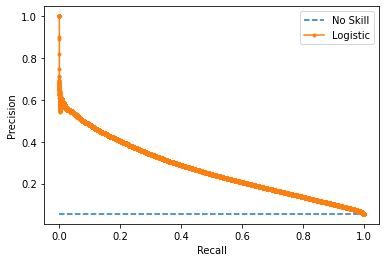

<Figure size 432x288 with 0 Axes>

In [78]:
# plot no skill and model precision-recall curves
from sklearn.metrics import *
def plot_pr_curve(test_y, model_probs):
	# calculate the no skill line as the proportion of the positive class
	no_skill = len(test_y[test_y==1]) / len(test_y)
	# plot the no skill precision-recall curve
	plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
	# plot model precision-recall curve
	precision, recall, _ = precision_recall_curve(test_y, model_probs)
	plt.plot(recall, precision, marker='.', label='Logistic')
	# axis labels
	plt.xlabel('Recall')
	plt.ylabel('Precision')
	# show the legend
	plt.legend()
	# show the plot
	plt.show()
    
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(y_test, y_pred)    
plt.savefig("LOG_PR_AUC_Model_with_GAN_AUG.png")

Logistic ROC AUC 0.832


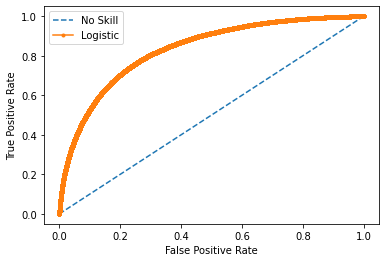

<Figure size 432x288 with 0 Axes>

In [79]:
 
# plot no skill and model roc curves
def plot_roc_curve(test_y, naive_probs, model_probs):
	# plot naive skill roc curve
	fpr, tpr, _ = roc_curve(test_y, naive_probs)
	plt.plot(fpr, tpr, linestyle='--', label='No Skill')
	# plot model roc curve
	fpr, tpr, _ = roc_curve(test_y, model_probs)
	plt.plot(fpr, tpr, marker='.', label='Logistic')
	# axis labels
	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	# show the legend
	plt.legend()
	# show the plot
	plt.show()
roc_auc = roc_auc_score(y_test, y_pred)
print('Logistic ROC AUC %.3f' % roc_auc)
# plot roc curves
plot_roc_curve(y_test, np.zeros(len(y_pred)), y_pred)
plt.savefig("LOG_ROC_AUC_Model_with_GAN_AUG.png")

In [75]:
## multi class

In [76]:
from sklearn.metrics import *
precision = dict()
recall = dict()

auc_ls = []

    y_test_arg = decide_apply_cat(y_test, 2)
    precision[i], recall[i], _ = precision_recall_curve(y_test_arg[:, i],
                                                        y_pred[:, i])
    auc_ls.append(auc(recall[i], precision[i]))
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()
print(auc_ls)
print(np.mean(auc_ls))

# baseline is 28.8

IndentationError: unexpected indent (<ipython-input-76-b6ae7c568517>, line 7)

In [ ]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    y_test_arg = decide_apply_cat(y_test, 2)
    fpr[i], tpr[i], _ = roc_curve(y_test_arg[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
